**LOGISTIC REGRESSION MODEL**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique, it gives the probabilistic values which lie between 0 and 1.Logistic regression predicts the output of a categorical dependent variable

**Dataset Description**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1.   ID number
2.   Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:



1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)


**Load libraries**

Both Pandas and NumPy provide a wide range of functions for manipulating and analyzing data, including functions for handling missing data, grouping data, merging datasets, and filtering data.

Matplotlib is a popular Python library used for creating visualizations and plots.

Seaborn is a popular Python library for creating statistical visualizations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

The above code imports the warnings module and sets a filter to ignore all warning messages that may be generated during the execution of the code.

**Reading the dataset**

Used Breast cancer dataset to predict the number of patients having cancer.

In [ ]:
df=pd.read_csv("/content/data.csv", nrows=1000)

In [ ]:
#shape of the dataset
df.shape

(569, 33)

In [ ]:
#To see the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The above code prints information about the DataFrame, including the number of non-null values, the data types of each column, and the memory usage.

**Data Preprocessing**

In [ ]:
#Checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

 Only 'Unnamed: 32' is completely null in the above output, probably an error in the dataset, we drop it.

In [ ]:
#Dropping the columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

The above code uses the drop() method in pandas library to remove the 'id' and 'Unnamed: 32' columns from a pandas DataFrame, and modifies the original DataFrame in place by setting the inplace parameter to True.

The drop() method is used to remove one or more columns from a DataFrame.

The axis parameter set to 1, indicating that the columns should be removed. The inplace parameter is set to True to modify the DataFrame object in place.

In [ ]:
#To display dataset
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The above code is used to display the first n rows of a dataset. By default, the method returns the first 5 rows of the dataset.

This method is useful for quickly inspecting the data in a DataFrame, verifying that the data has been loaded correctly, and getting a sense of the data types and values in the DataFrame

In [ ]:
#Checking for unique values
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

The above code uses the unique() method in pandas library to return an array of unique values in the 'diagnosis' column of a pandas DataFrame.

By calling this method on the 'diagnosis' column of the DataFrame, we can quickly verify that there are only two possible diagnoses in the data, which is expected based on the assumed nature of the data.

In [ ]:
#Reassing the target value
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The above code modifies the 'diagnosis' column of a pandas DataFrame by mapping the categorical values 'M' (malignant) and 'B' (benign) to the binary values 1 and 0, respectively. The map() method in pandas library is used to replace values in a column of a DataFrame based on a dictionary or a function.

By mapping the categorical values to binary values, the 'diagnosis' column can now be used as the target variable for binary classification models.

In [ ]:
#To describ the statisticl summary
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The above code is used to generate descriptive statistics for a pandas DataFrame. The method computes various statistical measures such as count, mean, standard deviation, minimum, maximum, and quartiles for each numeric column in the DataFrame

The IQR method is a commonly used technique for identifying potential outliers in a dataset. It is based on the interquartile range, which is the range of values that fall between the 25th and 75th percentiles of the data. Any values that fall outside this range are considered potential outliers.

This method can be useful for identifying potential outliers in a DataFrame and flagging any data points that may require further inspection or cleaning.

In [ ]:
#To display the shape of the dataset after checking the outliers
df.shape

(569, 31)

**Exploratory data analysis**

It can help us better understand data, communicate findings, identify outliers and anomalies, support better decision-making, and facilitate exploratory data analysis.

In [ ]:
X=df.drop(columns='diagnosis')
y = df.diagnosis

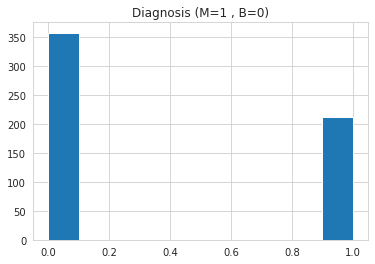

In [ ]:
#Histogram plot
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

The above code is using the Pandas and Matplotlib libraries to generate descriptive statistics and a histogram of the 'diagnosis' variable in the Dataset

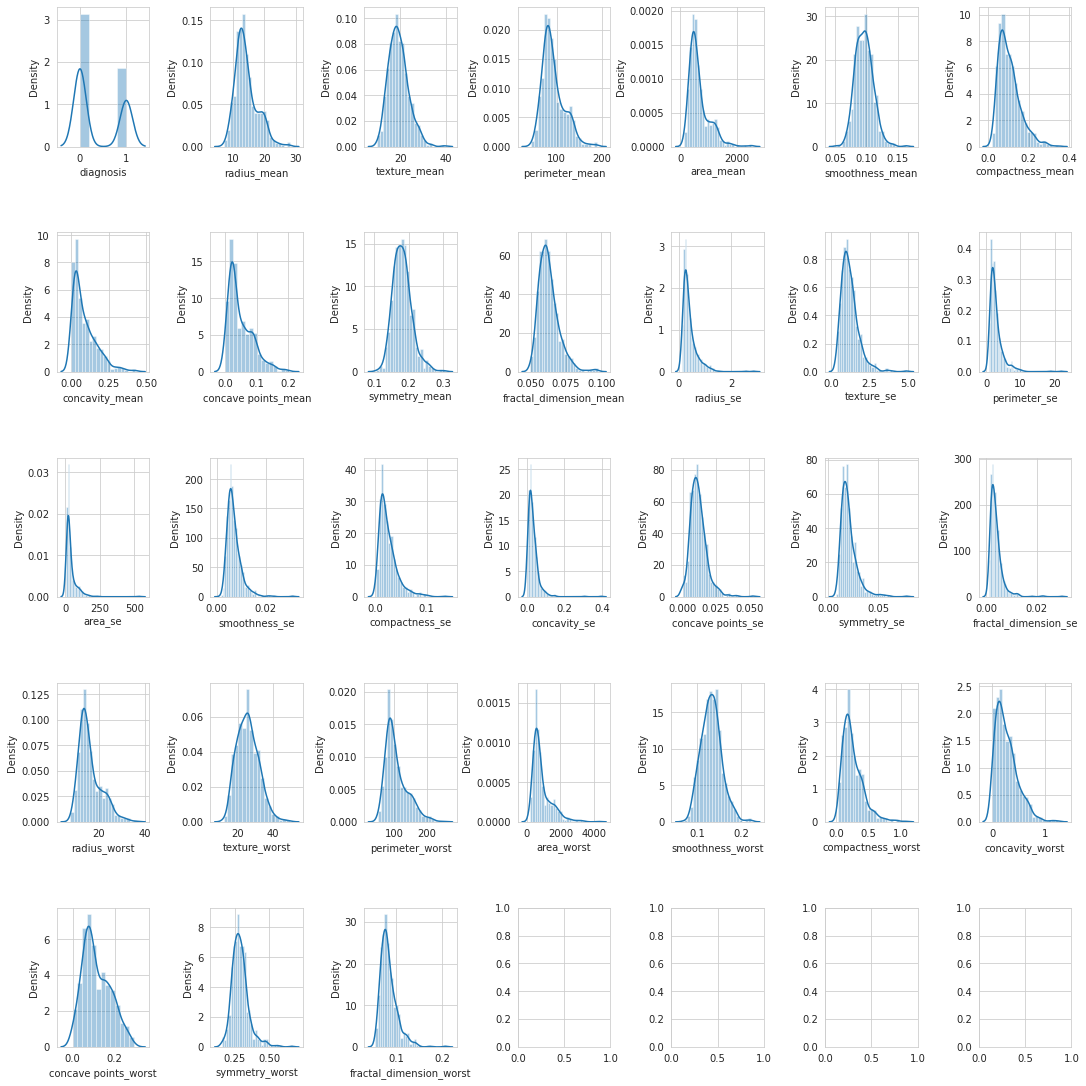

In [ ]:
#pairplot
fig, axs = plt.subplots(ncols=7, nrows=5, figsize=(15, 15))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The above code is using the Matplotlib and Seaborn libraries to create a grid of six histograms, one for each column in the Dataset

<AxesSubplot:>

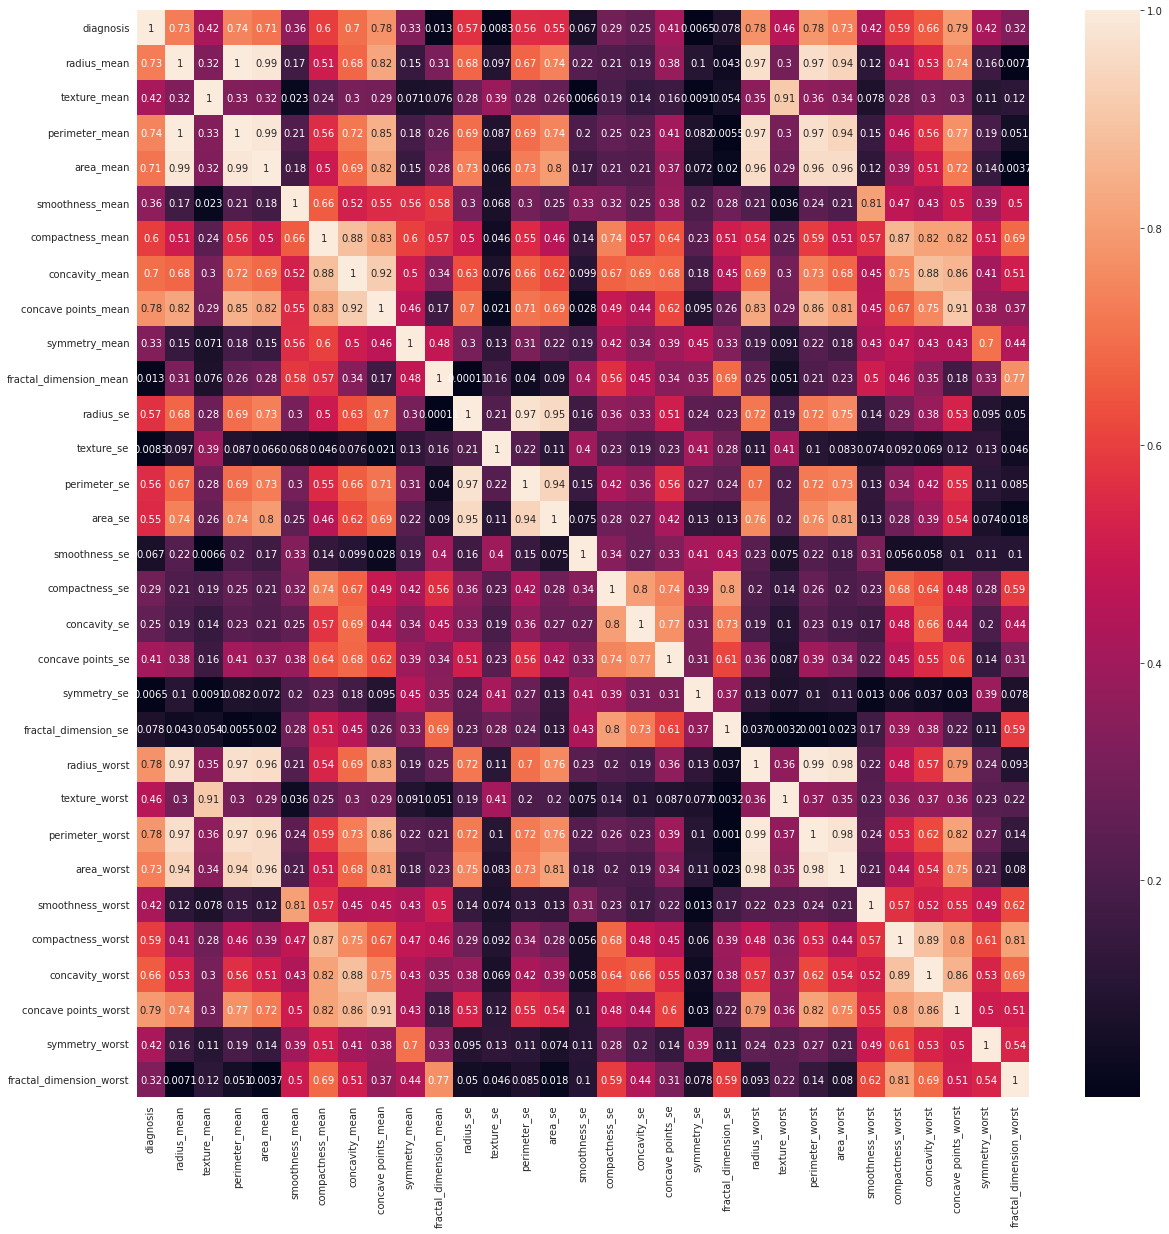

In [ ]:
#heatmap plot
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr().abs(),  annot=True)

The above code is using the Matplotlib and Seaborn libraries to create a heatmap of the correlation matrix between the columns of the Dataset.

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold to drop highly correlated features
threshold = 0.5

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated features from the dataframe
df = df.drop(df[to_drop], axis=1)

# Print the remaining features
print(df.columns)


Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'texture_se',
       'smoothness_se', 'symmetry_se'],
      dtype='object')


The above code creates a correlation matrix for a pandas DataFrame df, sets a threshold value for highly correlated features, and drops any features with a correlation greater than the threshold value.

This method can be useful for reducing the dimensionality of a dataset by removing redundant features that are highly correlated with each other. This can help to improve the performance of machine learning models by reducing the risk of overfitting and increasing the interpretability of the models.

In [ ]:
#Cheking the shape of the df after removing the columns
df.shape

(569, 6)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

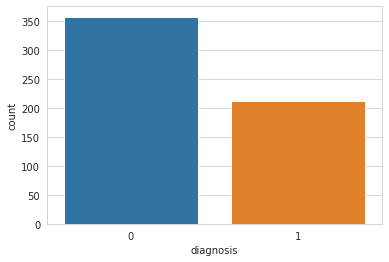

In [ ]:
#Count plot
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

The above code uses the seaborn library to create a countplot of the target variable diagnosis in a pandas DataFrame df.

A countplot is a type of bar plot that shows the counts of observations in each category using bars. In this case, the countplot shows the number of observations in each class of the diagnosis variable, which is a binary variable with two classes: malignant (M) and benign (B). 

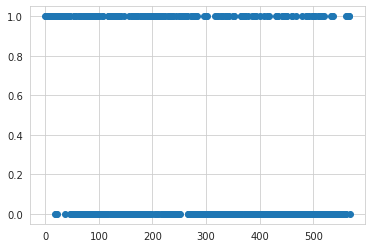

In [ ]:
#Scatter plot
plt.scatter(df.index, df['diagnosis'])
plt.show()

The above code uses the matplotlib library to create a scatter plot of the target variable diagnosis in a pandas DataFrame df.

A scatter plot is a type of plot that shows the relationship between two variables by displaying the values of the variables as points in a two-dimensional coordinate system. In this case, the scatter plot shows the relationship between the index of the rows in the DataFrame and the values of the diagnosis column, which is a binary variable with two classes: malignant (M) and benign (B)

**Feature Engineering**

Feature engineering is the process of transforming raw data into features that can be used as input to machine learning models to improve their performance on a given task. It involves selecting, extracting, transforming, and creating features from the raw data that can capture the relevant information and patterns that are useful for the machine learning algorithm.

The above code creates two new variables, X and y, from a pandas DataFrame df that contains a dataset of features and a target variable.

By separating the features and target variable into separate variables, we can easily pass them as input to machine learning algorithms and evaluate the performance of the algorithms on the target variable.

In [ ]:
#Splitting the dataset to train and test
split_ratio = 0.8
n = len(X)
train_data = int(n * split_ratio)
test_data = n - train_data
X_train = X[:train_data]
y_train = y[:train_data]
X_test = X[train_data:]
y_test = y[train_data:]

The above code is used to split the dataset into training and testing sets for machine learning model training and evaluation.

By splitting the dataset into training and testing sets, we can train the machine learning model on the training set and evaluate its performance on the testing set. This helps us to estimate how well the model is likely to perform on new, unseen data.

**Model Building**

**Sigmoid Function**

the sigmoid function is a mathematical function that maps any input to a value between 0 and 1, which can be interpreted as the probability of the input belonging to a certain class. The sigmoid function is used as the activation function in the logistic regression model to calculate the output.

In [ ]:
#sigmoid function
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [ ]:
#Logistic Regressio function
class LogisticRegression():

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

    def set_params(self, lr=None, n_iters=None):
        if lr:
            self.lr = lr
        if n_iters:
            self.n_iters = n_iters

The above code defines a class LogisticRegression that implements logistic regression algorithm for binary classification.

The set_params() of the LogisticRegression class that allows setting new values for the lr (learning rate) and n_iters (number of iterations) hyperparameters of the logistic regression model.

In [ ]:
best_lr, best_n_iters, best_acc = grid_search(X, y, learning_rates, n_iters_values)
print("Best score:", best_acc)
print("Best learning_rate:", best_lr)
print("Best n_iters:", best_n_iters)
model = LogisticRegression()
model.set_params(lr=best_lr, n_iters=best_n_iters)
model.fit(X_train, y_train)

Best score: 0.9209138840070299
Best learning_rate: 0.05
Best n_iters: 1000


In [ ]:
#predicting the model
y_pred = model.predict(X_test)

**Mean Square Error**

Mean Squared Error. It is a measure of the average squared difference between the predicted and actual values in a regression problem. The formula for calculating MSE is:

MSE = (1/n) * Σ(y - ŷ)^2

Where:

n is the number of data points
y is the actual value
ŷ is the predicted value

In [ ]:
mse = np.mean((y_pred - y_test) ** 2)
print('MSE:', mse)

MSE: 0.17543859649122806


In [ ]:
def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

The above function calculates the accuracy of the predicted labels by comparing them with the true labels. Specifically, it counts the number of instances where y_test and y_pred are equal and divides it by the total number of instances in y_test.

In [ ]:
#Calling the accuracy function
a= accuracy(y_test, y_pred)
print(a)

0.8245614035087719


**Confusion Matrics**

Confusion matrix is a table that is used to evaluate the performance of a classification model by comparing the predicted and actual class labels.

The confusion matrix consists of four categories: True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN). These categories are used to calculate several performance metrics, such as accuracy, precision, recall, and F1-score.

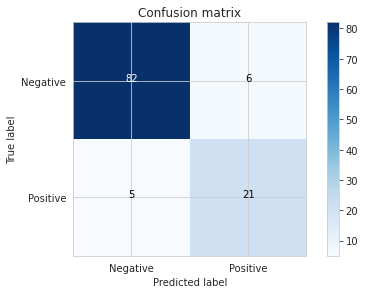

Precision: 0.7777777777777778
Recall: 0.8076923076923077
Accuracy: 0.9035087719298246
F1-score: 0.7924528301886792


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def get_confusion_matrix(y_test, y_pred):
    tp, fp, tn, fn = 0, 0, 0, 0
    for true, pred in zip(y_test, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1
    cm = np.array([[tn, fp], [fn, tp]])
    return cm

cm = get_confusion_matrix(y_test, y_pred)

# Calculate the metrics
tp, fp, tn, fn = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + tn + fn)
f1_score = 2 * ((precision * recall) / (precision + recall))

plot_confusion_matrix(cm, ['Negative', 'Positive'], normalize=False, title='Confusion matrix')

# Print the metrics
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1-score:', f1_score)

The above code defines two functions plot_confusion_matrix() and get_confusion_matrix() and then uses them to calculate and plot the confusion matrix for a binary classification problem.

After obtaining the confusion matrix, the code calculates several classification metrics such as precision, recall, accuracy, and F1-score using the elements of the confusion matrix. These metrics are then printed to the console.

**Hyperparameter Tuning**

Hyperparameter tuning refers to the process of finding the optimal values for the hyperparameters of a machine learning model.

Finding the optimal values for the hyperparameters is crucial for achieving the best possible performance of a machine learning model. Hyperparameter tuning involves searching over a range of possible values for each hyperparameter and evaluating the performance of the model on a validation set for each combination of hyperparameters

**Grid search**

Grid search is a technique for hyperparameter tuning that involves creating a grid of hyperparameter combinations and searching over them to find the optimal combination of hyperparameters that maximizes the performance of a model on a given task. It involves defining a set of hyperparameters to be tuned, a range of values for each hyperparameter, and a metric to evaluate the performance of the model for each combination of hyperparameters.

In [ ]:
# Define grid search function
def grid_search(X, y, learning_rates, n_iters_values):
    best_acc = 0
    best_lr = None
    best_n_iters = None

    for lr in learning_rates:
        for n_iters in n_iters_values:
            clf = LogisticRegression(lr=lr, n_iters=n_iters)
            clf.fit(X, y)
            y_pred = clf.predict(X)
            acc = sum(y_pred == y) / len(y)
            if acc > best_acc:
                best_acc = acc
                best_lr = lr
                best_n_iters = n_iters

    return best_lr, best_n_iters, best_acc

# Define hyperparameter search space
learning_rates = [0.05, 0.5, 5]
n_iters_values = [100, 1000, 10000]

This code defines a function grid_search that takes as input X (features), y (target variable), learning_rates, and n_iters_values (hyperparameter search space).

In [ ]:
best_lr, best_n_iters, best_acc= grid_search(X, y, learning_rates, n_iters_values)
print("Best score:", best_acc)
print("Best learning_rate:", best_lr)
print("Best n_iters:", best_n_iters)

Best score: 0.9209138840070299
Best learning_rate: 0.05
Best n_iters: 1000


The above code calls the grid search function to find the best combination of hyperparameters (learning_rate and n_iters) for a logistic regression model trained on the given dataset X and corresponding labels y.

The function returns the best values for learning_rate, n_iters, and accuracy based on the given hyperparameters. These values are then printed using the print() function. Specifically, the best score (accuracy), best learning_rate, and best n_iters are printed.

-----------------------------END-----------------------------